In [8]:
#Importing neccessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
train = pd.read_csv("train.csv")

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Exploring dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

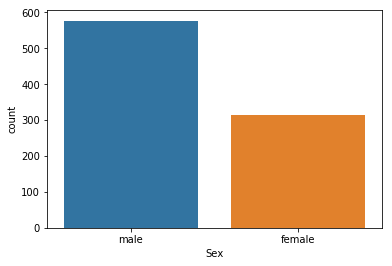

In [29]:
#Exploratory Data analysis/Visualization

sns.countplot(train['Sex'])

#According to this visuals, we can see more men than women.

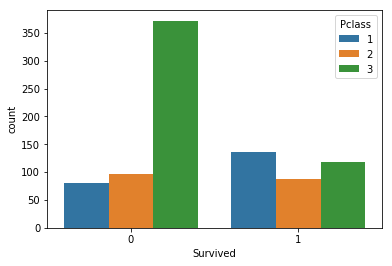

In [32]:
#Let’s see how many people survived divided by class.
sns.countplot(x='Survived', hue='Pclass', data=train)
#Class 1 Survived more compaared to others

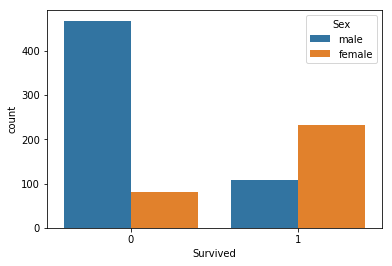

In [33]:
sns.countplot(x='Survived', hue='Sex', data=train)
#Female Survived more

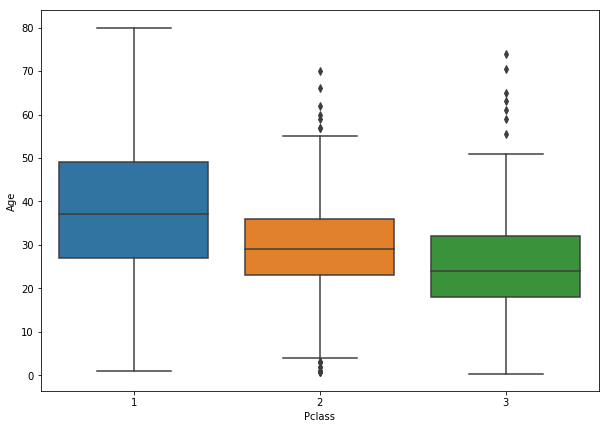

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)
#Age has some missing values

In [36]:
train['Age'].isnull().sum()

177

In [37]:
#Treating missing values

def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [40]:
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)

#We replace the null values in column Age with the Age mean value to treat the missing values
train['Age'].isnull().sum()


0

In [ ]:
#We have lots of null values for Cabin column, so we just remove it.
train.drop("Cabin",inplace=True,axis=1)

In [44]:
#Eliminating all missing values from the dataset
train.dropna(inplace=True)

In [45]:
#Let’s use the get_dummies function of Pandas. It will create two columns, one for male, one for female.
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [49]:
sex = pd.get_dummies(train["Sex"],drop_first=True)

In [53]:
#Applying same for the other 2 columns(Embarked,Pclass)
embarked = pd.get_dummies(train["Embarked"],drop_first=True)
Pclass = pd.get_dummies(train["Pclass"],drop_first=True)

In [54]:
#Concatinating the columns after all EDA and data cleansing accordingly
train = pd.concat([train,Pclass,sex,embarked],axis=1)

In [55]:
#Then, we remove some columns that we are not going to use for our model.
train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [56]:
#Time to build our model
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [59]:
#Fitting the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
#Predictions made
ypred = logmodel.predict(X_test)

In [63]:
#Classification report of  survival prediction value from my model
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [64]:
print(confusion_matrix(y_test,ypred))

[[149  14]
 [ 36  68]]


In [66]:
#Our final score of the model/Accuracy of the model
print(logmodel.score(X_test,y_test))

0.8127340823970037


In [68]:
#Actual survival
y_test

511    0
613    0
615    1
337    1
718    0
152    0
826    0
418    0
614    0
241    1
747    1
291    1
656    0
128    1
868    0
640    0
269    1
496    1
142    1
321    0
158    0
490    0
185    0
110    0
480    0
724    1
139    0
657    0
7      0
238    0
      ..
476    0
327    1
734    0
760    0
808    0
226    1
762    1
866    1
598    0
636    0
85     1
24     0
546    1
603    0
754    1
270    0
728    0
722    0
873    0
90     0
414    1
197    0
84     1
259    1
819    0
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

In [69]:
#predicted value of survival
ypred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)